Grupo: Gabriela Cristina Moreira dos Santos,
       Lucas Guilherme Silva de Carvalho

---

#**Reconhecimento facial em risco: Vulnerabilidades e defesas contra ataques adversariais.**

# **Reconhecimento facial utilizando uma CNN**

---

O código apresentado constrói e treina um modelo de reconhecimento facial usando uma rede neural convolucional (CNN). Ele utiliza o conjunto de dados "Labeled Faces in the Wild", com imagens de celebridades. O código pode ser dividido em preparação e carregamento dos dados, construção da arquitetura da CNN, treinamento do modelo e avaliação do desempenho. Durante o treinamento, são utilizadas técnicas como aumento de dados e oversampling para evitar o overfitting e balancear as classes. O desempenho do modelo é avaliado através de métricas como acurácia, recall e precisão.


### **Instalando Pacotes**
* keras - aprendizado profundo (deep learning)
* scikit-learn - aprendizado de máquina de propósito geral
* imbalanced-learn - métodos que abordam o problema de desbalanceamento de classes

In [ ]:
!pip install keras scikit-learn imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importa a função 'drive' da biblioteca 'google.colab'
from google.colab import drive

# Monta o Google Drive no diretório '/content/drive'
drive.mount('/content/drive')

Mounted at /content/drive


### **Importações**
* numpy - álgebra linear
* keras - aprendizado profundo (deep learning)
* sklearn.dataset - para baixar o conjunto de dados "Labeled Faces in the Wild"
* sklearn.model_selection - para dividir o conjunto de dados em treinamento/teste
* sklearn.metrics - para medir o desempenho do nosso classificador
* matplotlib.pyplot - exibir imagens e gráficos
* imblearn.over_sampling - método de oversampling aleatório para lidar com o desequilíbrio de classes

In [ ]:
import numpy as np
import keras
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from skimage import util

### **Conjunto de dados Labeled Faces in the Wild**
A célula abaixo faz o download do conjunto de dados usando a função fetch_lfw_people e verifica a dimensionalidade do conjunto de dados.

In [ ]:
# Faz o download do conjunto de dados Labeled Faces in the Wild utilizando a função fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=20, color=True, resize=1.0,
                              slice_=(slice(48, 202), slice(48, 202)))

# Atribui as imagens do conjunto de dados à variável X
X = lfw_people.images

# Atribui os rótulos do conjunto de dados à variável y
y = lfw_people.target

# Atribui os nomes das classes (pessoas) à variável target_names
target_names = lfw_people.target_names

# Obtém o número de classes (pessoas) no conjunto de dados
n_classes = target_names.shape[0]

# Imprime o número de exemplos (imagens) no conjunto de dados
print('Número de exemplos: {}'.format(y.shape[0]))

# Imprime a dimensionalidade das imagens (tamanho em pixels)
print('Dimensionalidade das imagens: {}'.format(X.shape[1:]))

# Imprime o número de classes únicas (pessoas) no conjunto de dados
print('Número de classes únicas (pessoas): {}'.format(n_classes))

number of examples: 3023
dimensionality of images: (154, 154, 3)
number of unique classes (people): 62


In [ ]:
# Imprime os nomes das classes presentes no conjunto de dados
print (target_names)

['Abdullah Gul' 'Adrien Brody' 'Alejandro Toledo' 'Alvaro Uribe'
 'Amelie Mauresmo' 'Andre Agassi' 'Andy Roddick' 'Angelina Jolie'
 'Ann Veneman' 'Anna Kournikova' 'Ari Fleischer' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Atal Bihari Vajpayee' 'Bill Clinton'
 'Bill Gates' 'Bill McBride' 'Bill Simon' 'Britney Spears' 'Carlos Menem'
 'Carlos Moya' 'Catherine Zeta-Jones' 'Charles Moose' 'Colin Powell'
 'Condoleezza Rice' 'David Beckham' 'David Nalbandian' 'Dick Cheney'
 'Dominique de Villepin' 'Donald Rumsfeld' 'Edmund Stoiber'
 'Eduardo Duhalde' 'Fidel Castro' 'George HW Bush' 'George Robertson'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Gonzalo Sanchez de Lozada' 'Gordon Brown' 'Gray Davis' 'Guillermo Coria'
 'Halle Berry' 'Hamid Karzai' 'Hans Blix' 'Harrison Ford'
 'Hillary Clinton' 'Howard Dean' 'Hu Jintao' 'Hugo Chavez' 'Ian Thorpe'
 'Igor Ivanov' 'Jack Straw' 'Jackie Chan' 'Jacques Chirac' 'Jacques Rogge'
 'James Blake' 'James Kelly' 'Jason Kidd' 'Javier Solana'

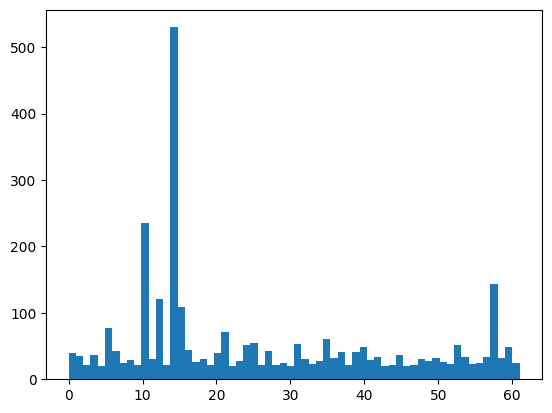

In [ ]:
# Plotar um histograma mostrando quantos exemplos tem por classe
_ = plt.hist(y, bins=n_classes)

In [ ]:
# Seleciona um índice aleatório a partir do comprimento das imagens no conjunto de dados
i = np.random.randint(len(lfw_people.images))

Jennifer Aniston


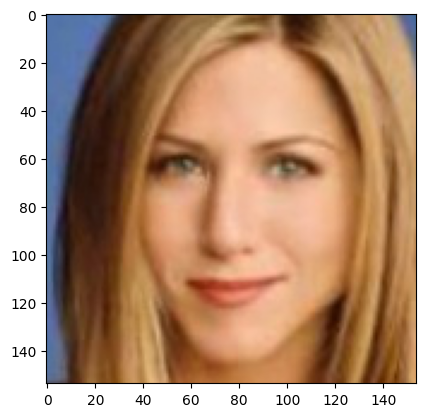

In [ ]:
# Exibir uma imagem aleatória junto com o seu rótulo
plt.imshow(lfw_people.images[i])
plt.grid(False)
print(target_names[y[i]])

Jennifer Aniston


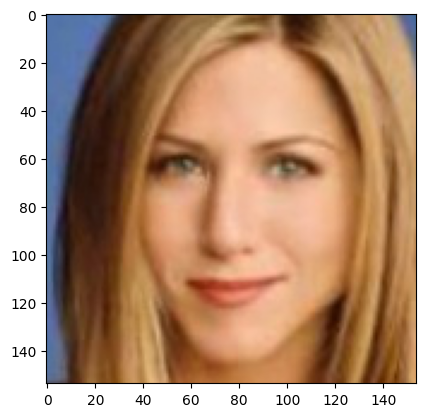

In [ ]:
# Exibir uma imagem aleatória junto com o seu rótulo
image = util.img_as_float(lfw_people.images[i])

plt.imshow(image)
plt.grid(False)
print(target_names[y[i]])

### **Deep learning**

Vamos construir um modelo inspirado na All Convolutional Net, que é descrito no artigo "Striving for Simplicity: The All Convolutional Net". [Striving for Simplicity: The All Convolutional Net](https://arxiv.org/abs/1412.6806).

#### **Código**

In [ ]:
# Importar alguns objetos de camada do Keras.
from keras.layers import Input
from keras.layers import Conv2D, GlobalAvgPool2D
from keras.layers import Dropout, Activation

In [ ]:
# Definição da Arquitetura da Rede Neural Convolucional (CNN)
input = Input(shape=X.shape[1:])                                  # 154x154x3
x = Conv2D(12, (3, 3), padding='same', activation='relu')(input)  # 154x154x12
x = Conv2D(12, (2, 2), strides=(2, 2), activation='relu')(x)      # 77x77x12
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)      # 77x77x16
x = Conv2D(16, (2, 2), strides=(2, 2), activation='relu')(x)      # 38x38x16
x = Conv2D(24, (3, 3), padding='same', activation='relu')(x)      # 38x38x24
x = Conv2D(24, (2, 2), strides=(2, 2), activation='relu')(x)      # 19x19x24
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)      # 19x19x32
x = Conv2D(32, (2, 2), strides=(2, 2), activation='relu')(x)      # 9x9x32
x = Conv2D(48, (3, 3), padding='same', activation='relu')(x)      # 9x9x48
x = Conv2D(48, (2, 2), strides=(2, 2), activation='relu')(x)      # 4x4x48
x = Dropout(0.5)(x)                                               # 4x4x48
x = Conv2D(n_classes, (1, 1))(x)                                  # 4x4x62
x = GlobalAvgPool2D()(x)                                          # 62
output = Activation('softmax')(x)                                 # 62

#### **Explicação**

O código define a arquitetura de uma rede neural convolucional (CNN) usando a biblioteca Keras. A arquitetura é composta por várias camadas convolucionais, onde cada camada aplica filtros aos dados de entrada, seguidas por camadas de ativação ReLU. A dimensionalidade espacial é reduzida por meio de camadas de pooling e uma camada de dropout é adicionada para evitar overfitting. A arquitetura é finalizada com uma camada convolucional e uma camada de pooling global média. A saída é obtida através de uma camada de ativação softmax, que fornece as probabilidades das classes.

### **Plotagem da Arquitetura da Rede Neural Convolucional (CNN)**

In [ ]:
# Criar um modelo de rede neural convolucional utilizando as camadas de entrada (input) e saída (output)
from keras.models import Model
model = Model(inputs=input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 154, 154, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 154, 154, 12)      336       
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 12)        588       
                                                                 
 conv2d_2 (Conv2D)           (None, 77, 77, 16)        1744      
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 16)        1040      
                                                                 
 conv2d_4 (Conv2D)           (None, 38, 38, 24)        3480      
                                                                 
 conv2d_5 (Conv2D)           (None, 19, 19, 24)        2328  

In [ ]:
# Aplicar técnicas de aumento de dados - gerando variações que aumentam a diversidade dos dados e ajudam a evitar o overfitting
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1)

### **Treinamento**

#### **Código**

In [ ]:
from keras import Model

batch_size = 256
test_split = 0.2
base_lr = 0.001
epochs = 120

# Divisão do conjunto de dados em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split,
                                                    stratify=y, random_state=42)

# Sobreamostragem de cada classe para conter pelo menos 256 exemplos
sampling_targets = np.maximum([256] * n_classes, np.bincount(y_train))
ratio_dict = dict(zip(range(n_classes), sampling_targets))
ros = RandomOverSampler(sampling_strategy=ratio_dict, random_state=42)

X_train_shape = X_train.shape
X_train = np.reshape(X_train, (X_train_shape[0], -1))
X_train, y_train = ros.fit_resample(X_train, y_train)
X_train = np.reshape(X_train, (len(X_train),) + X_train_shape[1:])

# Codificação dos rótulos
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

# Compilação do modelo e definição da otimização
model = Model(inputs=input, outputs=output)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(lr=base_lr),
              metrics=['Acurácia'])

# Treinamento do modelo
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/nadam.py:89: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
<ipython-input-13-ae32ab96e9eb>:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),


Epoch 1/120
62/62 [==============================] - 101s 1s/step - loss: 4.1251 - accuracy: 0.0239 - val_loss: 4.0938 - val_accuracy: 0.0711
Epoch 2/120
62/62 [==============================] - 84s 1s/step - loss: 4.1238 - accuracy: 0.0267 - val_loss: 4.0685 - val_accuracy: 0.1537
Epoch 3/120
62/62 [==============================] - 84s 1s/step - loss: 4.0895 - accuracy: 0.0310 - val_loss: 3.9544 - val_accuracy: 0.1620
Epoch 4/120
62/62 [==============================] - 84s 1s/step - loss: 3.9846 - accuracy: 0.0454 - val_loss: 3.9703 - val_accuracy: 0.0479
Epoch 5/120
62/62 [==============================] - 83s 1s/step - loss: 3.8422 - accuracy: 0.0679 - val_loss: 3.7402 - val_accuracy: 0.0860
Epoch 6/120
62/62 [==============================] - 82s 1s/step - loss: 3.7209 - accuracy: 0.0875 - val_loss: 3.6274 - val_accuracy: 0.1157
Epoch 7/120
62/62 [==============================] - 81s 1s/step - loss: 3.5616 - accuracy: 0.1142 - val_loss: 3.4764 - val_accuracy: 0.1223
Epoch 8/120


In [ ]:
model.save('weights.h5')

In [ ]:
# Salvar o modelo no Google Drive
model.save('/content/drive/MyDrive/IA/Projeto_Final/model/modelo_treinado.h5')

#### **Explicação**

O código dessa seção utiliza a biblioteca Keras para treinar um modelo de aprendizado profundo (Deep Learning). O processo inclui a definição de parâmetros como tamanho do lote, proporção de teste, taxa de aprendizado e número de épocas. Os dados são divididos em conjuntos de treinamento e teste, sendo aplicada a técnica de sobreamostragem para lidar com o desequilíbrio de classes. Os dados são redimensionados e os rótulos são codificados usando one-hot encoding. O modelo é compilado com função de perda, otimizador e métricas de avaliação. O treinamento é realizado para fazer previsões precisas no conjunto de dados, empregando técnicas como convolução, pooling e dropout para melhorar o desempenho e evitar overfitting.

### **Resultados**

#### **Histórico de Treinamento da Precisão do Modelo**

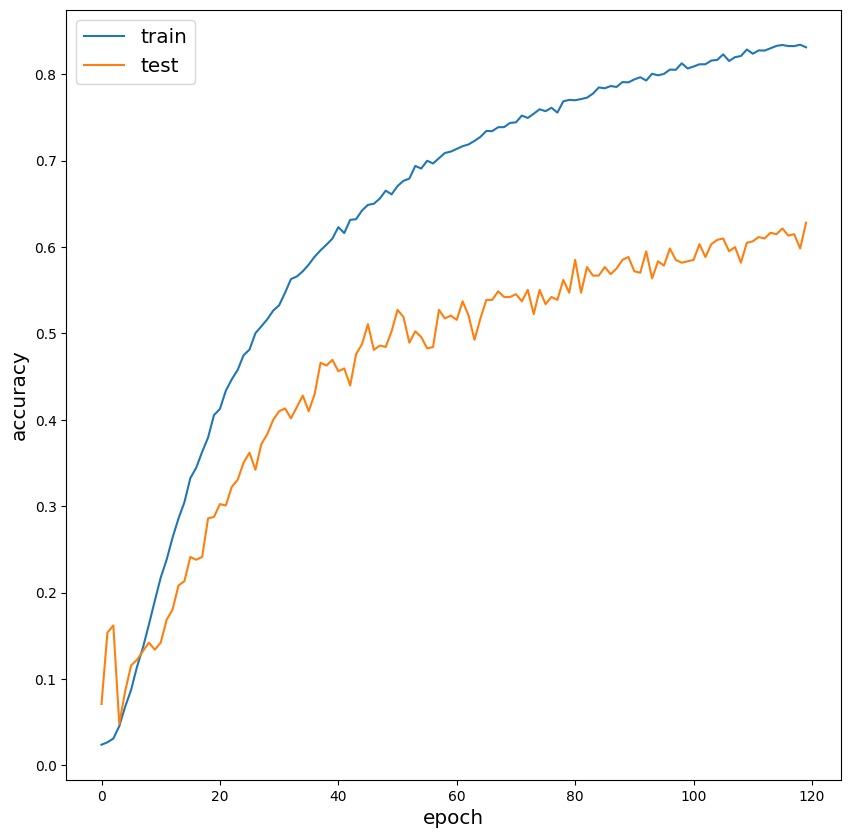

In [ ]:
# Plotar o histórico de treinamento para avaliar a precisão do modelo
plt.figure(figsize=(10, 10))
plt.plot(history.history['Acurácia'])
plt.plot(history.history['val_Acuracia'])
plt.ylabel('Acuracia', fontsize='x-large')
plt.xlabel('Epoca', fontsize='x-large')
plt.legend(['Treino', 'Teste'], loc='upper left', fontsize='x-large')


In [ ]:
# Realização da previsão e conversão dos resultados em rótulos
y_pred = model.predict(X_test, batch_size=len(X_test), verbose=1)
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 2s 2s/step


In [ ]:
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    # Plotando a matriz de confusão como uma imagem
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    # Definindo os rótulos dos eixos x e y como as classes
    tick_marks = np.arange(0, len(classes), 2)
    plt.xticks(tick_marks, classes[tick_marks], rotation=90)
    plt.yticks(tick_marks, classes[tick_marks])

    # Definindo o rótulo do eixo y como "True label" (Rótulo verdadeiro)
    plt.ylabel('Rótulo verdadeiro', fontsize='x-large')

    # Definindo o rótulo do eixo x como "Predicted label" (Rótulo previsto)
    plt.xlabel('Rótulo previsto', fontsize='x-large')


#### **Gráfico Matriz de Confusão**
O código cria um gráfico que ilustra a matriz de confusão normalizada, um instrumento que evidencia os acertos e erros de um modelo de classificação para cada classe, ajustado pelo total de exemplos por classe. Isso permite uma comparação justa da precisão da classificação, mesmo com desequilíbrio de dados.

No gráfico, cada célula, colorida conforme seu valor, representa uma proporção da previsão correta para cada classe. O eixo x mostra as previsões do modelo e o y, os rótulos verdadeiros.

Esse gráfico serve para avaliar visualmente o desempenho do modelo de classificação. Diagonais dominantes (com cores mais intensas) sinalizam alto desempenho, enquanto desvios podem indicar dificuldades na classificação de classes específicas. Assim, o gráfico é um aliado na identificação de pontos fracos do modelo, facilitando sua análise e otimização.

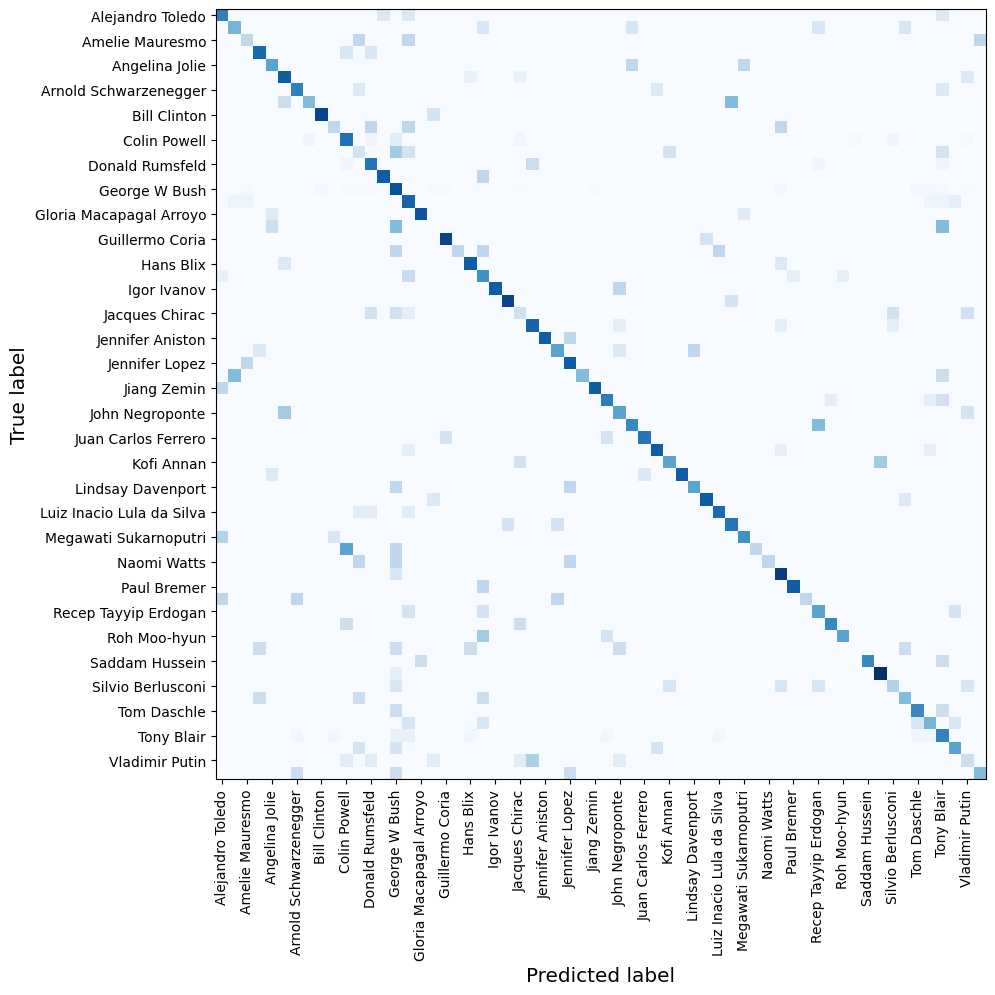

In [ ]:
plt.figure(figsize=(10, 10))  # Define o tamanho da figura do gráfico como 10x10

# Calcula a matriz de confusão usando os rótulos verdadeiros (y_test) e as previsões (y_pred)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Normaliza a matriz de confusão dividindo cada valor pelo total de exemplos da classe correspondente
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Chama a função plot_confusion_matrix para plotar a matriz de confusão normalizada
plot_confusion_matrix(cm, classes=target_names)

plt.grid(False)  # Desativa as linhas de grade no gráfico


#### **Gráfico de Barras Horizontais das Acurácias por Classe**

In [ ]:
# Importa a biblioteca matplotlib.pyplot com o apelido plt
# Importa a biblioteca numpy com o apelido np
import matplotlib.pyplot as plt
import numpy as np

# Define a função plot_barh que recebe como argumentos "labels" (rótulos) e "values" (valores)
def plot_barh(labels, values):
    # Define o tamanho da figura do gráfico
    fig = plt.figure(figsize=(12, 8))

    # Cria uma sequência numérica do mesmo tamanho que os rótulos
    y_pos = np.arange(len(labels))

    # Desenha um gráfico de barras horizontais com os valores fornecidos
    plt.barh(y_pos, values, align='center', alpha=0.5)

    # Define as marcas do eixo y para corresponder aos rótulos
    plt.yticks(y_pos, labels)

    # Define as marcas do eixo x para variar de 0.0 a 1.0 em incrementos de 0.05
    plt.xticks(np.arange(0.0, 1.0, 0.05))

    # Adiciona um rótulo ao eixo x
    plt.xlabel('Acuracia', fontsize='x-large')

    # Define uma grade horizontal no eixo x
    plt.axes().xaxis.grid(color='black', linestyle='-', linewidth=0.5)

    # Pega os eixos atuais do gráfico
    axes = plt.gca()

    # Define os limites do eixo x entre 0.0 e 1.0
    axes.set_xlim([0.0, 1.0])

    # Desenha uma linha vertical verde no valor médio de "values"
    axes.axvline(np.mean(values), color='green', linewidth=2)

    # Ajusta automaticamente os parâmetros do gráfico para que tudo caiba na figura
    plt.tight_layout()

In [ ]:
# Criar uma lista com as acurácias para cada classe de um modelo de classificação
class_accuracies = [cm[i, i] for i in range(cm.shape[0])]

average accuracy: 55.6%


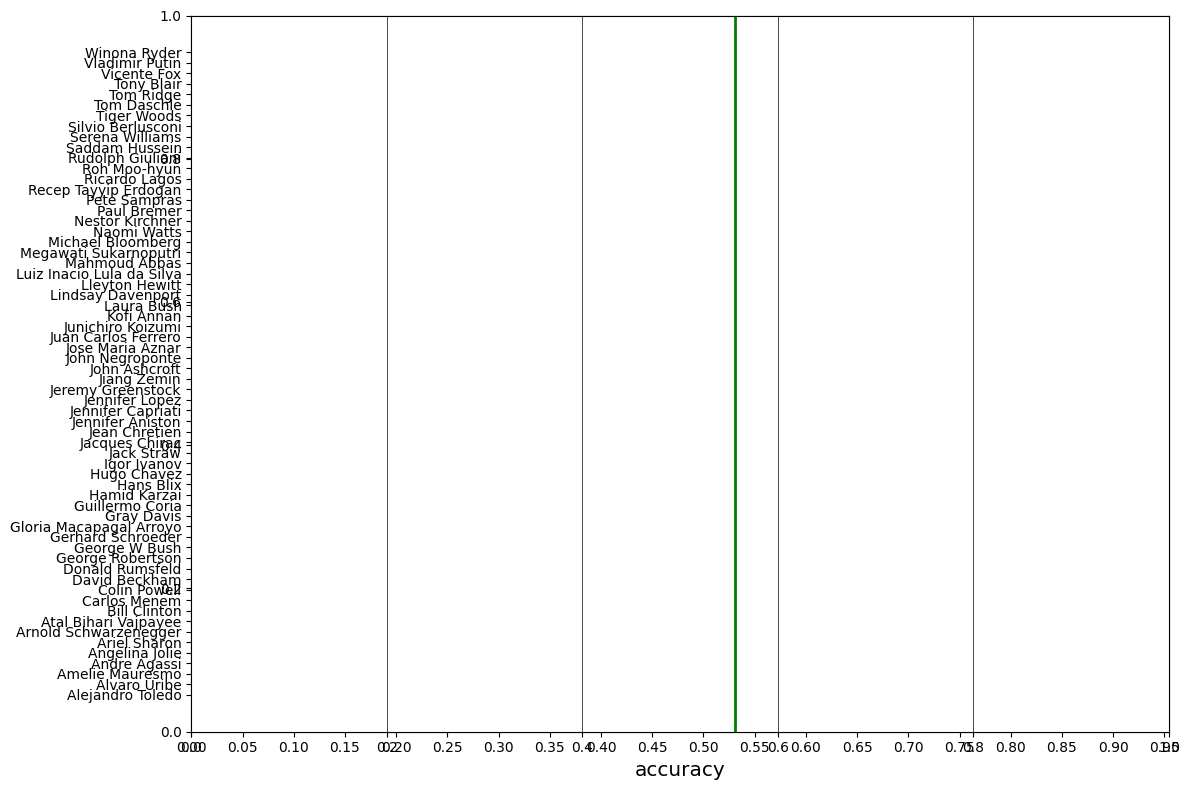

In [ ]:
plot_barh(target_names, class_accuracies)
print('Acuracia media {}%'.format(np.round(np.mean(class_accuracies) * 100.0, 1)))

#### **Recall**
O cálculo do recall (revocação) e da média do recall serve para avaliar a capacidade do modelo de classificação em identificar corretamente exemplos positivos de cada classe.

In [ ]:
recall = np.diag(cm) / np.sum (cm, axis = 1)

np.mean(recall)

0.5560870811709091

#### **Calcula a precisão**
Calcula a precisão (precision) para cada classe individual na matriz de confusão

In [ ]:
precision = np.diag(cm) / np.sum (cm, axis = 0)
np.mean(precision)

0.6297909126410474